Measurement Counts:
{'10': 125, '11': 369, '00': 491, '01': 39}


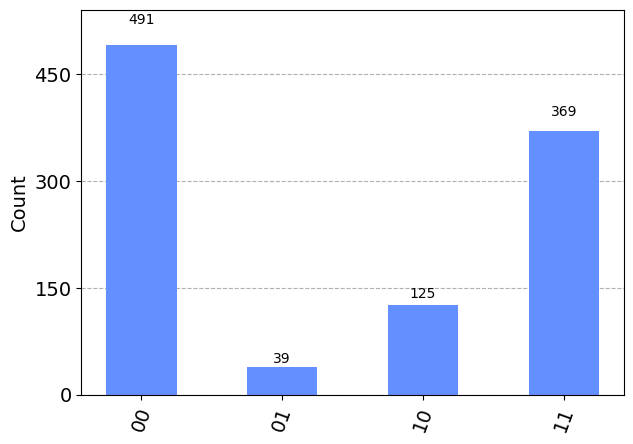

In [1]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.visualization import plot_bloch_multivector, plot_histogram

 
# Bell Circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
# Run the sampler job locally using FakeManilaV2
fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(qc)
 
# You can use a fixed seed to get fixed results. 
options = {"simulator": {"seed_simulator": 42}}
sampler = Sampler(backend=fake_manila, options=options)
 
result = sampler.run([isa_qc]).result()
pub_result = result[0]

counts = pub_result.data.meas.get_counts()  # Get the counts dictionary

# Print the measurement counts
print("Measurement Counts:")
print(counts)


# Visualize the measurement counts as a histogram
plot_histogram(counts)

In [2]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(backend=fake_manila, options=options)

n_qubits = 2

observable = SparsePauliOp("Z" * n_qubits)
qc.measure_all()
 
pm = generate_preset_pass_manager(optimization_level=1, backend=fake_manila)
isa_circuit = pm.run(qc)
isa_observable = observable.apply_layout(isa_circuit.layout)
 
job_est = estimator.run([(isa_circuit, isa_observable)])
result_est = job_est.result()
 
print(f" > Expectation value: {result_est[0].data.evs}")
print(f" > Metadata: {result_est[0].metadata}")


 > Expectation value: 0.6611328125
 > Metadata: {'target_precision': 0.015625}


In [4]:
print(result_est)

PrimitiveResult([PubResult(data=DataBin<>(evs=0.6611328125, stds=0.011722951374324027), metadata={'target_precision': 0.015625})], metadata={})


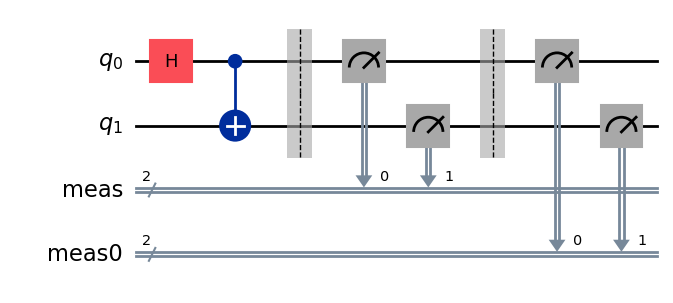

In [3]:
qc.draw("mpl", style="iqp")